### Range of input variables

We want to check if the numerical models are falling out of range

In [1]:
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt
from datatree import DataTree
from datatree import open_datatree

import xgcm

import sys
sys.path.append('../modules/')
import helper_func as hf

# Import seaborn
import seaborn as sns

In [2]:
M2LINES_BUCKET ='gs://leap-persistent/dhruvbalwada/m2lines_transfer'

In [3]:
# Open all the datasets
Lkey = ['50', '100', '200', '400']

ds = {}
for L in Lkey:
    
    ds_temp = xr.open_zarr(f'{M2LINES_BUCKET}/ML_data/ds_ML_'+L+'km_3D')
    
    ds[L] = ds_temp
ds_tree = DataTree.from_dict(ds)

# Open the mask files
ds_mask_tree = open_datatree(f'{M2LINES_BUCKET}/ML_data/ds_ML_masks', engine='zarr')

In [4]:
output_channels = ['Sfnx','Sfny']                                      

input_channels_all = ['U_x', 'U_y', 
                      'V_x', 'V_y', 
                      'Sx', 'Sy', 'Lfilt']

In [5]:
# Normalize by T_z for some variables
# Center all the data
facs = {}

ds_tree_centered = {}
for L in Lkey:
    
    # Select dataset
    ds = ds_tree[L].ds
    grid = xgcm.Grid(ds, periodic='X')
    
    # Center the variables
    ds_centered = hf.center_data(ds)
    ds_centered['T_z'] = (ds_centered['T_z'].where(ds_centered['T_z']>=5e-5, 5e-5)) #.isel(time=0, XC=0).plot(vmin=-6e-3)

    # Add variables that are actually used in the model.
    ds_centered['Sx'] = -ds_centered['T_x']/ds_centered['T_z']
    ds_centered['Sy'] = -ds_centered['T_y']/ds_centered['T_z']

    ds_centered['Sfnx'] =  - ds_centered['uT']/ds_centered['T_z']
    ds_centered['Sfny'] =  - ds_centered['vT']/ds_centered['T_z']

    ds_centered['Lfilt'] = (float(L) + 0*ds_centered.T)
#     # Compute the VGM 
#     dx = ds_centered.dxC[0,0].values
#     fac = 13/6 * dx *dx 
    
#     # Save the factors
#     facs[L] = fac
        
#     # VGM Model 
#     ds_centered['uT_vgm'] = fac*(ds_centered.U_x*ds_centered.T_x + ds_centered.U_y*ds_centered.T_y)
#     ds_centered['vT_vgm'] = fac*(ds_centered.V_x*ds_centered.T_x + ds_centered.V_y*ds_centered.T_y)  
    
#     # GM model
    
#     #ds_centered['uT_vgm'] = uT_vgm
#     ds_centered['vT_gm'] = -1e4*ds_centered.T_y

    # Only consider variables that will be used in ML
    ds_ML_vars = xr.merge([ds_centered[output_channels], ds_centered[input_channels_all]])
    
    ds_tree_centered[L] = ds_ML_vars
    
ds_tree_centered = DataTree.from_dict(ds_tree_centered)

/srv/conda/envs/notebook/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/srv/conda/envs/notebook/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/srv/conda/envs/notebook/lib/python3.11/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in orde

In [7]:
ds_plot = ds_tree_centered.isel(time=slice(0, 20, 4)).sel(Z=slice(-200, -2700), YC=slice(400e3,1600e3))
# The spatial range is same as what is used for training

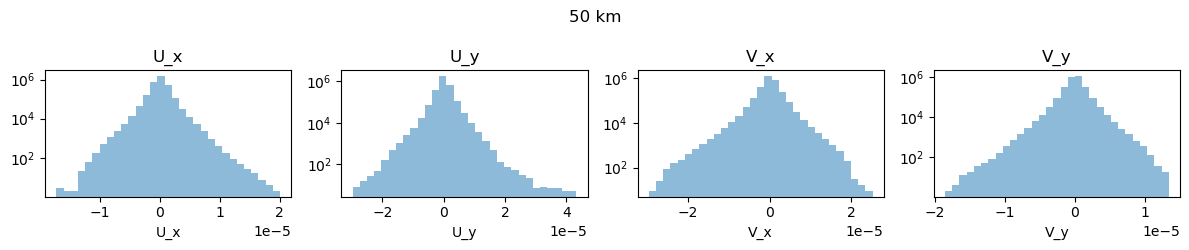

/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: divide by ze

In [8]:
plt.figure(figsize=(12, 2.5))

L= '50'

plt.subplot(141)
ds_plot[L].ds.U_x.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('U_x')

plt.subplot(142)
ds_plot[L].ds.U_y.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('U_y')

plt.subplot(143)
ds_plot[L].ds.V_x.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('V_x')

plt.subplot(144)
ds_plot[L].ds.V_y.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('V_y')

plt.suptitle(L+' km')
plt.tight_layout()


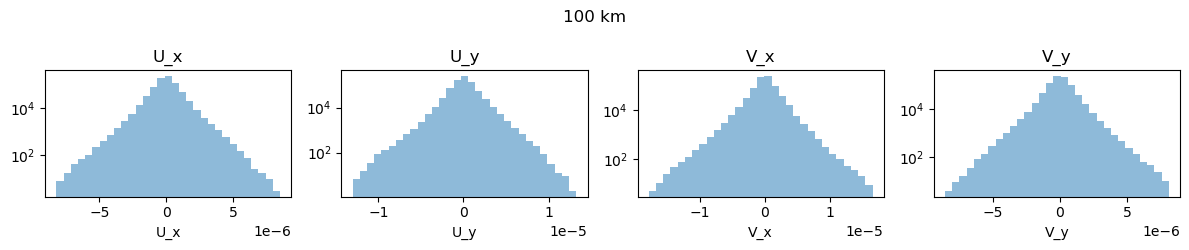

In [8]:
plt.figure(figsize=(12, 2.5))

L= '100'

plt.subplot(141)
ds_plot[L].ds.U_x.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('U_x')

plt.subplot(142)
ds_plot[L].ds.U_y.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('U_y')

plt.subplot(143)
ds_plot[L].ds.V_x.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('V_x')

plt.subplot(144)
ds_plot[L].ds.V_y.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('V_y')

plt.suptitle(L+' km')
plt.tight_layout()


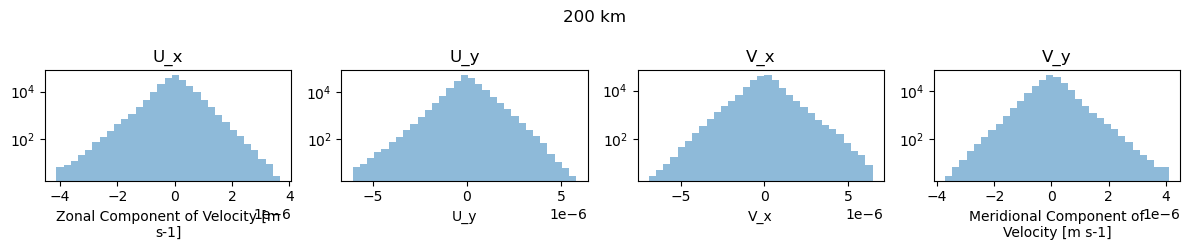

In [9]:
plt.figure(figsize=(12, 2.5))

L= '200'

plt.subplot(141)
ds_plot[L].ds.U_x.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('U_x')

plt.subplot(142)
ds_plot[L].ds.U_y.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('U_y')

plt.subplot(143)
ds_plot[L].ds.V_x.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('V_x')

plt.subplot(144)
ds_plot[L].ds.V_y.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('V_y')

plt.suptitle(L+' km')
plt.tight_layout()


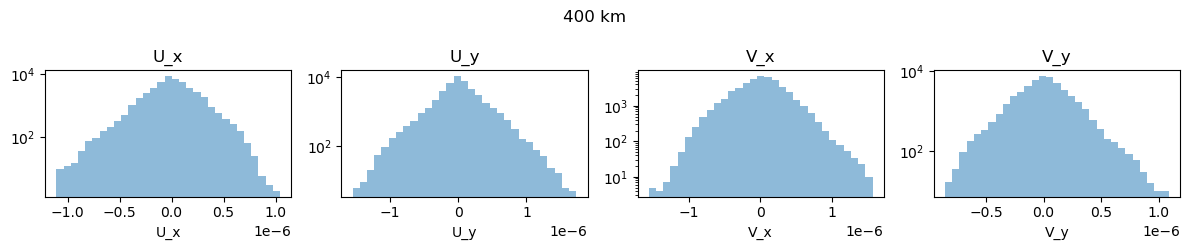

In [10]:
plt.figure(figsize=(12, 2.5))

L= '400'

plt.subplot(141)
ds_plot[L].ds.U_x.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('U_x')

plt.subplot(142)
ds_plot[L].ds.U_y.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('U_y')

plt.subplot(143)
ds_plot[L].ds.V_x.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('V_x')

plt.subplot(144)
ds_plot[L].ds.V_y.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('V_y')

plt.suptitle(L+' km')
plt.tight_layout()


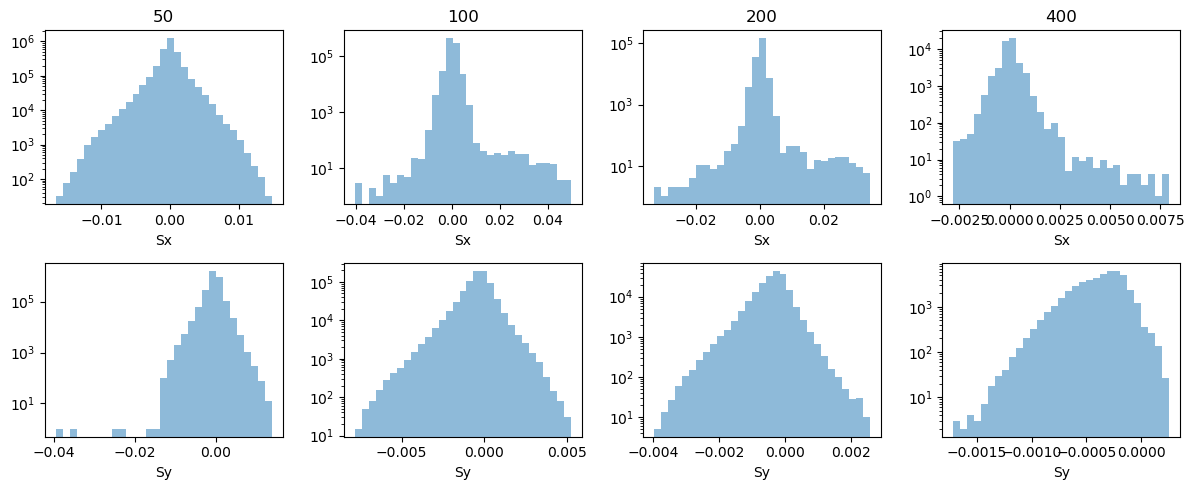

In [11]:
plt.figure(figsize=(12, 5))

L='50'
plt.subplot(241)
ds_plot[L].ds.Sx.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title(L)

plt.subplot(245)
ds_plot[L].ds.Sy.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')

L='100'
plt.subplot(242)
ds_plot[L].ds.Sx.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title(L)

plt.subplot(246)
ds_plot[L].ds.Sy.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')

L='200'
plt.subplot(243)
ds_plot[L].ds.Sx.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title(L)

plt.subplot(247)
ds_plot[L].ds.Sy.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')

L='400'
plt.subplot(244)
ds_plot[L].ds.Sx.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title(L)

plt.subplot(248)
ds_plot[L].ds.Sy.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')

plt.tight_layout()

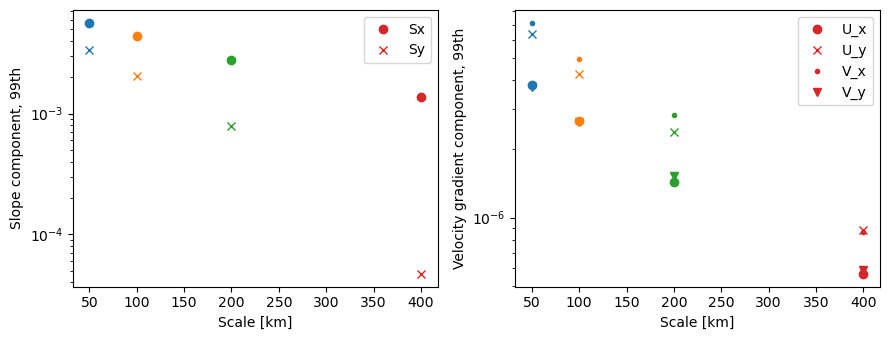

In [41]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
for i,L in enumerate(Lkey):
    Lint = float(L)

    if i==3:
        plt.plot(Lint, np.percentile(ds_plot[L].ds.Sx, 99), 'o', color='C'+str(i), label='Sx')
        plt.plot(Lint, np.percentile(ds_plot[L].ds.Sy, 99), 'x', color='C'+str(i), label='Sy')
    else:
        plt.plot(Lint, np.percentile(ds_plot[L].ds.Sx, 99), 'o', color='C'+str(i))
        plt.plot(Lint, np.percentile(ds_plot[L].ds.Sy, 99), 'x', color='C'+str(i))
    
plt.legend()
plt.yscale('log')
plt.xlabel('Scale [km]')
plt.ylabel('Slope component, 99th')

plt.subplot(122)
for i,L in enumerate(Lkey):
    Lint = float(L)

    if i == 3:
        plt.plot(Lint, np.percentile(ds_plot[L].ds.U_x, 99), 'o', color='C'+str(i), label='U_x')
        plt.plot(Lint, np.percentile(ds_plot[L].ds.U_y, 99), 'x', color='C'+str(i), label='U_y')
        plt.plot(Lint, np.percentile(ds_plot[L].ds.V_x, 99), '.', color='C'+str(i), label='V_x')
        plt.plot(Lint, np.percentile(ds_plot[L].ds.V_y, 99), 'v', color='C'+str(i), label='V_y')
    else:
        plt.plot(Lint, np.percentile(ds_plot[L].ds.U_x, 99), 'o', color='C'+str(i))
        plt.plot(Lint, np.percentile(ds_plot[L].ds.U_y, 99), 'x', color='C'+str(i))
        plt.plot(Lint, np.percentile(ds_plot[L].ds.V_x, 99), '.', color='C'+str(i))
        plt.plot(Lint, np.percentile(ds_plot[L].ds.V_y, 99), 'v', color='C'+str(i))
        
        
plt.legend()
plt.yscale('log')
plt.xlabel('Scale [km]')
plt.ylabel('Velocity gradient component, 99th')

plt.tight_layout()

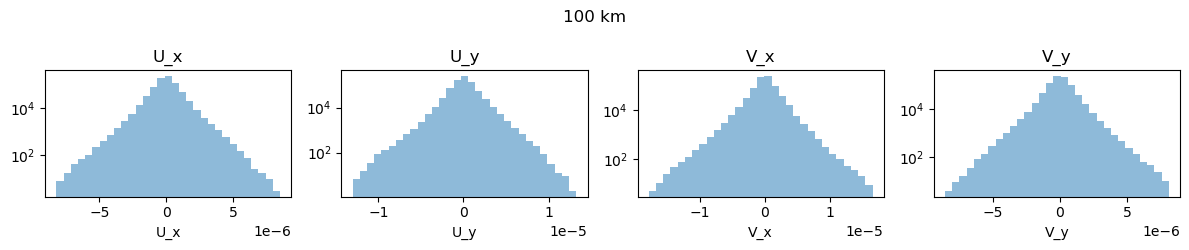

In [9]:
plt.figure(figsize=(12, 2.5))

L= '100'

plt.subplot(141)
ds_plot[L].ds.U_x.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('U_x')

plt.subplot(142)
ds_plot[L].ds.U_y.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('U_y')

plt.subplot(143)
ds_plot[L].ds.V_x.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('V_x')

plt.subplot(144)
ds_plot[L].ds.V_y.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('V_y')

plt.suptitle(L+' km')
plt.tight_layout()


In [63]:
L= '200'
Lscale = int(L)*1e3

In [64]:
magGradU = (ds_plot[L].ds.U_x**2 +
            ds_plot[L].ds.V_x**2 +
            ds_plot[L].ds.U_y**2 +
            ds_plot[L].ds.V_y**2 )**0.5

magS = (ds_plot[L].ds.Sx**2 + ds_plot[L].ds.Sy**2)**0.5

Text(0.5, 1.0, '|S|')

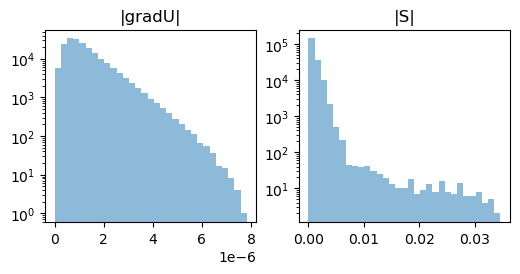

In [65]:
plt.figure(figsize=(6, 2.5))


plt.subplot(121)
magGradU.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('|gradU|')

plt.subplot(122)
magS.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('|S|')

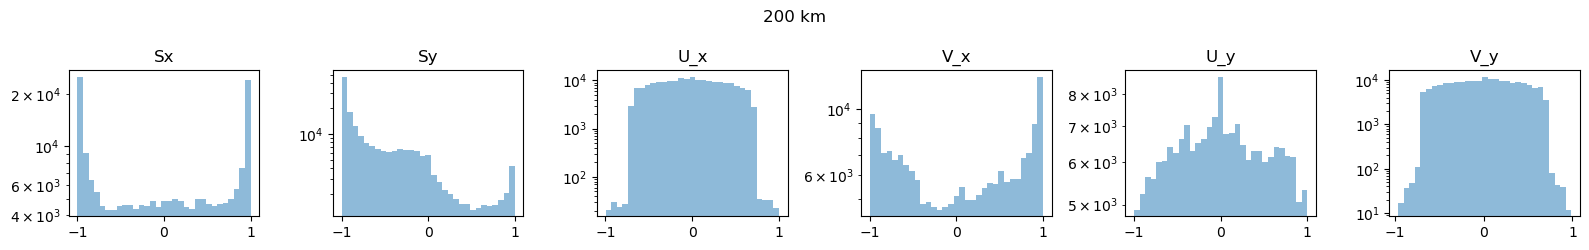

In [66]:
plt.figure(figsize=(16, 2.5))

plt.subplot(161)
(ds_plot[L].ds.Sx/magS).plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('Sx')

plt.subplot(162)
(ds_plot[L].ds.Sy/magS).plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('Sy')

plt.subplot(163)
(ds_plot[L].ds.U_x/magGradU).plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('U_x')

plt.subplot(164)
(ds_plot[L].ds.V_x/magGradU).plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('V_x')

plt.subplot(165)
(ds_plot[L].ds.U_y/magGradU).plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('U_y')

plt.subplot(166)
(ds_plot[L].ds.V_y/magGradU).plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('V_y')


plt.suptitle(L+' km')
plt.tight_layout()


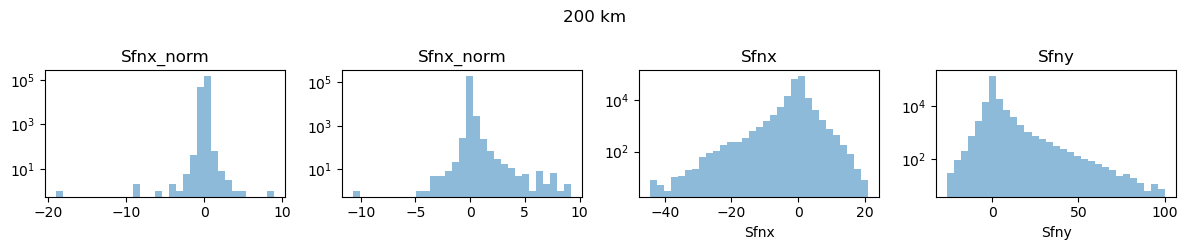

In [67]:
plt.figure(figsize=(12, 2.5))


plt.subplot(141)
(ds_plot[L].ds.Sfnx/magGradU/Lscale**2/magS).plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('Sfnx_norm')

plt.subplot(142)
(ds_plot[L].ds.Sfny/magGradU/Lscale**2/magS) .plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('Sfnx_norm')

plt.subplot(143)
ds_plot[L].ds.Sfnx.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('Sfnx')

plt.subplot(144)
ds_plot[L].ds.Sfny.plot.hist(bins=31, alpha=0.5)
plt.yscale('log')
plt.title('Sfny')

plt.suptitle(L+' km')
plt.tight_layout()
